<a href="https://colab.research.google.com/github/ShaikMohammad786/Machine-Learning-SEMV-Labs/blob/main/Lab4_AP23110011178.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [4]:
df = pd.read_csv("/content/DMV_Written_Tests.csv")

In [5]:
df.head(10)

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


### Task 3: Visualize the Data
---

(100, 3)
       DMV_Test_1  DMV_Test_2     Results
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000
    DMV_Test_1  DMV_Test_2  Results
0        False       False    False
1        False       False    False
2        False       False    False
3        False       False    False
4        False       False    False
..         ...         ...      ...
95       False       False    False
96       False       False    False
97       False       False    False
98       False       False    False
99       False       False    False

[100 rows x 3 columns]


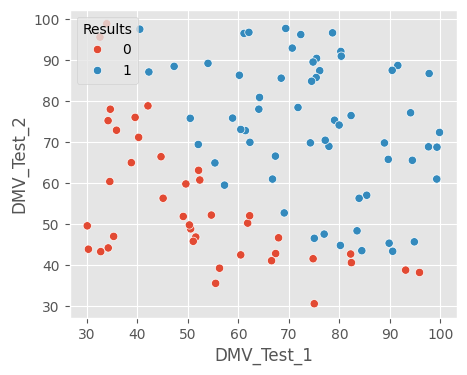

In [15]:
print(df.shape)
print(df.describe())
print(df.isnull())
plt.figure(figsize=(5,4))
sns.scatterplot(x="DMV_Test_1" , y = "DMV_Test_2" , data = df , hue ="Results")
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [16]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [17]:
print(sigmoid(2))

0.8807970779778823


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [35]:

def cost_and_gradient(X, y , theta):
  m = len(y)
  Z = X @ theta
  h = sigmoid(Z)

  J = (-1/m) * np.sum(((y)*(np.log(h))) + ((1-y)*np.log(1-h)))

  G = (1/m) * (X.T @ (h - y))

  return J,G


X = df.iloc[:, :-1].values  # features
y = df["Results"].values    # labels

# Add intercept term
X = np.c_[np.ones(len(X)), X]
theta = np.array([0.1,0.2,0.3])
alpha = 0.1


for i in range(1000):
  cost , grad = cost_and_gradient(x,y,theta )
  thetanew = theta - alpha*grad
  if( i%100 == 0):
    print(cost,grad)











7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]
7.790307249925314 [25.48768118 25.90767524  0.2       ]


### Task 6: Cost and Gradient at Initialization
---

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$